# Function Approximation Exercises

As always, please submit a julia module with functions `q1` through `q5`.

## 1. Plain Vanilla Chebyshev

In this exercise you should write some code that approximates the function $f(x) = x + 2x^2 - exp(-x)$ for $x\in[-3,3]$. You should define a function `q1(n)`, where `n` is the number of interpolation points. You should use an approximation of degree `deg=n-1`, and you should set `n=15` Chebyshev interpolation nodes.

* predict `n_new=100` new equally spaced points in $[-3,3]$ using your interpolator. 
* make a plot with 2 panels. panel 1 shows true function values and your approximation and panel 2 shows the deviation in your approximation from the true $f$. 
* Write an automated test that passes if the maximal deviation in your approximation from the true $f$ is smaller than `1e-9`.

Just to help you remember from the class, here are the steps you should follow:

1. define the function
1. specify degree of approximation
1. define bounds of domain
1. get Chebyshev interpolation nodes `z`
1. map `z` into `x`
1. get function values at `x`, `y=f(x)`
1. Evaluate the chebyshev basis matrix at `z`
1. Compute approximation coeffs `c` by matrix inversion. use the backslash operator `\` to achieve this. type `?\` to know more.


## 2. Question 1. with `ApproxFun.jl`

Redo exercise 1 with the `ApproxFun.jl` package. This should go into function `q2(n)`.

## 3. Plotting the Chebyshev Basis

plot the first nine Chebyshev basis functions in function `q3()`. You could take some inspiration for the plot from yesterday's slides.

## 4. Importance of node placement

In this exercise we want to investigate one of the dangers with polynomial approximation: placement of knots. We will focus on the classic example of Runge's function:
    $$ f(x) = \frac{1}{1+25x^2} ,x\in[-5,5]$$

### 4.a. Polynomial Interpolation: uniform vs chebyshev nodes. `q4a()`

Here we want to approximate $f$ with the Chebyshev polynomial. We want to learn the impact of evaluating the polynomial at an equidistant set of points as opposed to something else. 

* Produce a plot with 2 panels, *uniformly spaced* and *chebyshev nodes*:
    * Panel 1 should show approximations using a uniformly spaced grid of interpolation points. 
    * Panel 2 should show approximations using chebyshev interpolation points.
* Each panel should show 4 lines:
    1. The true function
    2. the resulting approximations from a Chebyshev Polynomial Interpolation of degrees $k=5,9,15$. Are we going to get a better approximation as we increase $k$?
* For each approximation, you should choose $n=k+1$ interpolation points.
* The code contains a custom `ChebyType` that I found useful to produce these plots. You may want to use it as well.

    
### 4.b. Spline Interpolation: where to place knots?  `q4b()`

* Produce a plot with 2 panels. Panel 1 (*Runge's function*) shows $f(x),x\in[-5,5]$, panel 2 (*Error in Runge's function*) shows deviations of your approximation to it (see below).
* Use 2 versions of a cubic spline to approximate the function:
    * version 1: use 13 equally spaced knots when you set up the `BSpline` object. Remember, that this is
    ```julia
    using ApproXD
    b = BSpline(nknots,deg,lb,ub)  # knot vector is chosen for you
    ```
    * version 2: use 13 knots that are concentrated towards 0.
    ```julia
    using ApproXD
    b = BSpline(my_knots,deg)   # you choose my_knots
    ```
* To estimate your approximating coefficients, evaluate the basis and $f$ at `nevals=5*13=65` equidistant points.
* So, panel 2 of your plot should show 2 lines (`f - approx1` and `f - approx2`), as well as the placement of your concentrated knots.

## 5. Splines and Kinks

Interpolate the function $f(x) = |x|^{0.5},x\in[-1,1]$ with a cubic spline, with 13 knots, and 65 evaluation points to estimate it's coefficients. 

Produce a plot with 3 panels:

1. Plot the true function. It has a kink at 0.
1. plot two spline approximations. 
    1. a spline with a uniform knot vector.
    1. a spline with a knot vector that has a knot multiplicity at the kink $x=0$. How many knots do you have to set equal to zero to produce a kink? note that the total number of (interior) knots should not change (i.e. 13).
1. In panel three plot the errors of both approximations.

In [5]:
using FastGaussQuadrature
using Plots
using Base.Test

unitmap(x,lb,ub) = 2.*(x.-lb)/(ub.-lb)-1
function ChebyBasis(ni::Int,nj::Int,nodes::Union{Vector,LinSpace})
    V = Array(Float64, ni, nj)
    V[:,1] = 1
    V[:,2] = nodes
        for j in 3:nj
            for i in 1:ni
                V[i,j] = 2*V[i,2]*V[i,j-1]-V[i,j-2]
        end
    end
    return V
end
function predict(n_new::Int, nj::Int, coeffs::Vector, lb::Float64, ub::Float64, f::Function)
    n_new = 100
    x_new = linspace(lb, ub, n_new)
    true_y = map(f, x_new)
    z_new = map((x) -> unitmap(x,lb,ub), x_new)
    cheby_basis = ChebyBasis(n_new,nj,z_new)
    cheby_y = cheby_basis * coeffs
    return cheby_y, true_y
end
n=15
pyplot()

Plots.PyPlotBackend()

In [4]:
# function to approximate
f(x) = x + 2*x^2 -exp(-x)
eps = 1e-9 # degree of approx
#define Chebychev nodes on [-1,1]
nodes = gausschebyshev(n)[1]
# map nodes onto [-3,3]
x_nodes = map((x) -> 3*x, nodes)
#true y values
y = map(f, x_nodes)
# basis matrix
V = ChebyBasis(n,n,nodes)
# solve to find c
c = V \ y
#predict values
cheby_y, true_y = predict(100, 15, c, -3.0, 3.0,f)
#test max deviation < 1e-9
@test maxabs(true_y - cheby_y) < 1e-9
#plots
plot1 = plot(x_new, [true_y, cheby_y], 
    label = ["f(x)" "f_hat(x)"], linestyle = [:dot :solid], linecolor = ["black" "red"])
plot2 = plot(x_new, true_y - cheby_y, label = "f(x) - f_hat(x)", yformatter = :scientific)
plot(plot1,plot2)

LoadError: UndefVarError: x_new not defined

100-element LinSpace{Float64}:
 -3.0,-2.93939,-2.87879,-2.81818,…,2.75758,2.81818,2.87879,2.93939,3.0

In [7]:
using ApproxFun


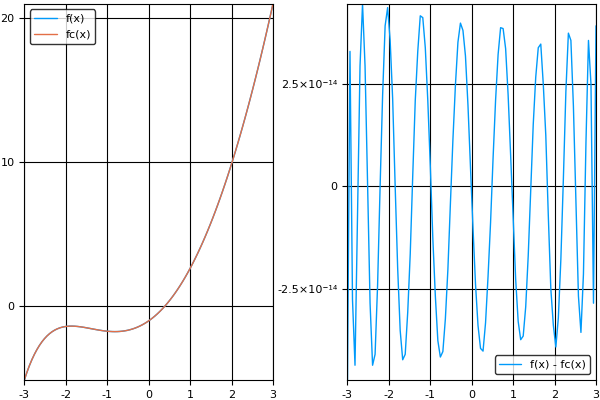

In [8]:
fc = Fun(f, Interval(-3,3))
n_new = 100
x_new = linspace(-3, 3, n_new)
true_y = map(f, x_new)
cheby_y = map(fc, x_new)
plot1 = plot(x_new, [true_y, cheby_y], label = ["f(x)" "fc(x)"])
plot2 = plot(x_new, true_y - cheby_y, yformatter = :scientific, label = "f(x) - fc(x)")
plot(plot1,plot2)

In [23]:
T0(x) = 1
T1(x) = x
T2(x) = 2*x*T1(x) - T0(x)
T3(x) = 2*x*T2(x) - T1(x)
T4(x) = 2*x*T3(x) - T2(x)
T5(x) = 2*x*T4(x) - T3(x)
T6(x) = 2*x*T5(x) - T4(x)
T7(x) = 2*x*T6(x) - T5(x)
T8(x) = 2*x*T7(x) - T6(x)

T8 (generic function with 1 method)


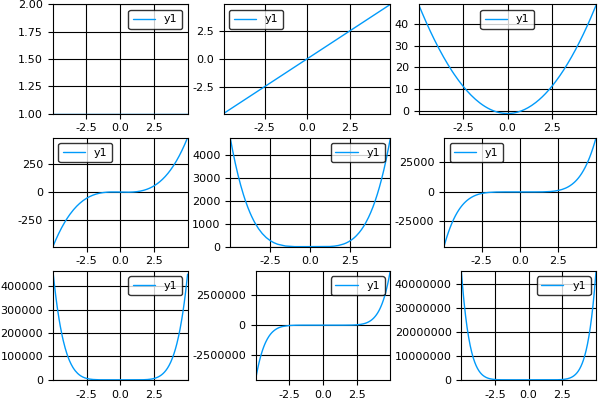

In [45]:
plot0 = plot(T0)
plot1 = plot(T1)
plot2 = plot(T2)
plot3 = plot(T3)
plot4 = plot(T4)
plot5 = plot(T5)
plot6 = plot(T6)
plot7 = plot(T7)
plot8 = plot(T8)
plot(plot0,plot1,plot2,plot3,plot4,plot5,plot6,plot7,plot8,layout = 9)


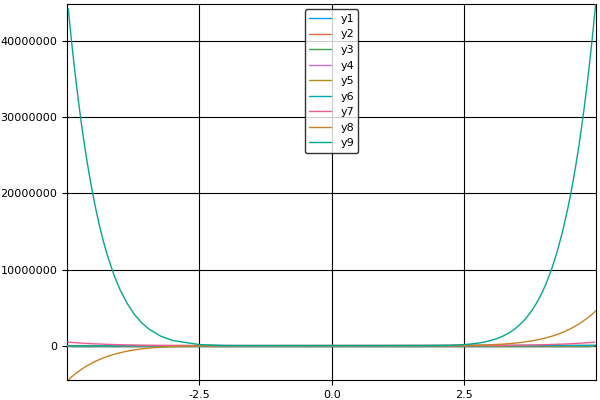

In [48]:
plot([T0,T1,T2,T3,T4,T5,T6,T7,T8])

In [47]:
ChebyT(x,deg) = cos(acos(x)*deg)
unitmap(x,lb,ub) = 2.*(x.-lb)/(ub.-lb) - 1	#[a,b] -> [-1,1]

	type ChebyType
		f::Function # fuction to approximate 
		nodes::Union{Vector,LinSpace} # evaluation points
		basis::Matrix # basis evaluated at nodes
		coefs::Vector # estimated coefficients

		deg::Int 	# degree of chebypolynomial
		lb::Float64 # bounds
		ub::Float64

		# constructor
		function ChebyType(_nodes::Union{Vector,LinSpace},_deg,_lb,_ub,_f::Function)
			n = length(_nodes)
			y = _f(_nodes)
			_basis = Float64[ChebyT(unitmap(_nodes[i],_lb,_ub),j) for i=1:n,j=0:_deg]
			_coefs = _basis \ y  # type `?\` to find out more about the backslash operator. depending the args given, it performs a different operation
			# create a ChebyType with those values
			new(_f,_nodes,_basis,_coefs,_deg,_lb,_ub)
		end
	end
	
	# function to predict points using info stored in ChebyType
	function predict(Ch::ChebyType,x_new)

		true_new = Ch.f(x_new)
		basis_new = Float64[ChebyT(unitmap(x_new[i],Ch.lb,Ch.ub),j) for i=1:length(x_new),j=0:Ch.deg]
		basis_nodes = Float64[ChebyT(unitmap(Ch.nodes[i],Ch.lb,Ch.ub),j) for i=1:length(Ch.nodes),j=0:Ch.deg]
		preds = basis_new * Ch.coefs
		preds_nodes = basis_nodes * Ch.coefs

		return Dict("x"=> x_new,"truth"=>true_new, "preds"=>preds, "preds_nodes" => preds_nodes)
	end

predict (generic function with 1 method)

## 4. Importance of node placement

In this exercise we want to investigate one of the dangers with polynomial approximation: placement of knots. We will focus on the classic example of Runge's function:
    $$ f(x) = \frac{1}{1+25x^2} ,x\in[-5,5]$$

### 4.a. Polynomial Interpolation: uniform vs chebyshev nodes. `q4a()`

Here we want to approximate $f$ with the Chebyshev polynomial. We want to learn the impact of evaluating the polynomial at an equidistant set of points as opposed to something else. 

* Produce a plot with 2 panels, *uniformly spaced* and *chebyshev nodes*:
    * Panel 1 should show approximations using a uniformly spaced grid of interpolation points. 
    * Panel 2 should show approximations using chebyshev interpolation points.
* Each panel should show 4 lines:
    1. The true function
    2. the resulting approximations from a Chebyshev Polynomial Interpolation of degrees $k=5,9,15$. Are we going to get a better approximation as we increase $k$?
* For each approximation, you should choose $n=k+1$ interpolation points.
* The code contains a custom `ChebyType` that I found useful to produce these plots. You may want to use it as well.

In [86]:
r(x) = 1/(1+25*x^2)
#unitmap(x,lb=-5,ub=5) = 2.*(x.-lb)/(ub.-lb) -1
unodes = Array(Vector,3)
i = 1
for n in [6, 10, 16]
    unodes[i] = linspace(-1,1,n)
    i = i+1
end
chnodes = Array(Vector,3)
i = 1
for n in [6, 10, 16]
    chnodes[i] = gausschebyshev(n)[1]
    i = i+1
end
function get_coeffs(lb::Int, ub::Int, nodes::Vector)
    n = length(nodes)
    y = r.(5.*nodes)
    V = ChebyBasis(n,n,nodes)
    c = V \ y
    return c
end
c = get_coeffs(-5, 5, unodes[1])
#function predict(n_new::Int, nj::Int, coeffs::Vector, lb::Float64, ub::Float64, f::Function)
y = Array{Vector}(3,2)
j=1
for nodes in [unodes, chnodes]
    i = 1
    for n in [6, 10, 16]
        y[i,j] = predict(100, n, get_coeffs(-5,5,nodes[i]), -5.0, 5.0,r)[1]
        i = i+1
    end
    j=j+1
end

In [56]:
y = Array{Tuple}(3,2)
for j in 1:2
    for i in 1:3
        y[i,j] = (zeros(i*j), zeros(i*j))
    end
end


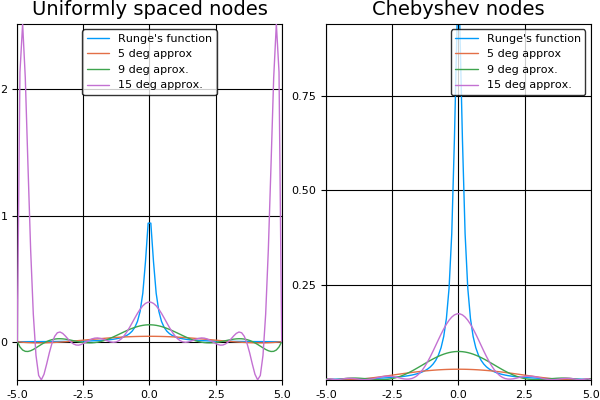

In [109]:
x_new = linspace(-5,5,100)
true_y = r.(x_new)
plot1 = plot(x_new, [true_y, y[1,1], y[2,1], y[3,1]],
    labels = ["Runge's function" "5 deg approx" "9 deg aprox." "15 deg approx."], title = "Uniformly spaced nodes")
plot2 = plot(x_new, [true_y, y[1,2], y[2,2], y[3,2]],
    labels = ["Runge's function" "5 deg approx" "9 deg aprox." "15 deg approx."], title = "Chebyshev nodes")
plot(plot1, plot2)


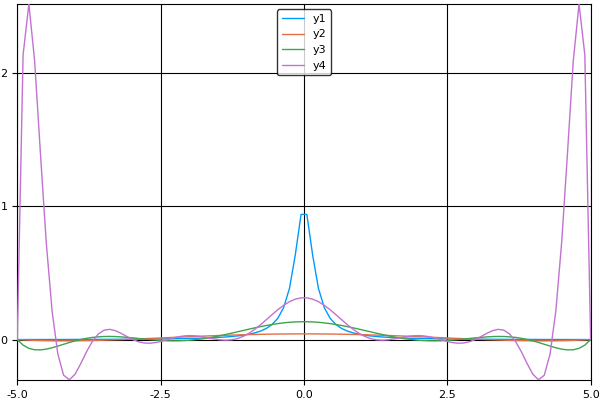

In [100]:
plot1 = plot(x_new, true_y)
plot1 = plot!(x_new,y[1,1])
plot1 = plot!(x_new,y[2,1])
plot1 = plot!(x_new,y[3,1])


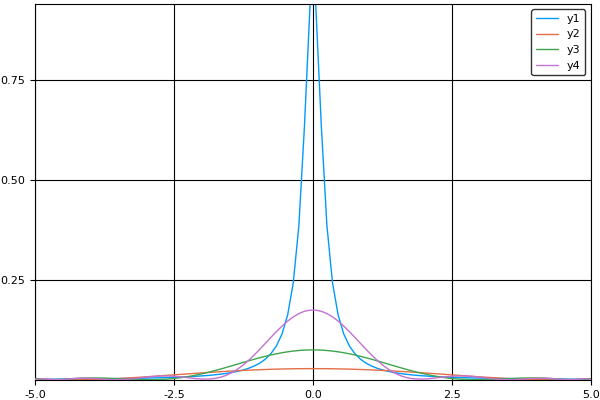

In [101]:
plot2 = plot(x_new, true_y)
plot2 = plot!(x_new,y[1,2])
plot2 = plot!(x_new,y[2,2])
plot2 = plot!(x_new,y[3,2])


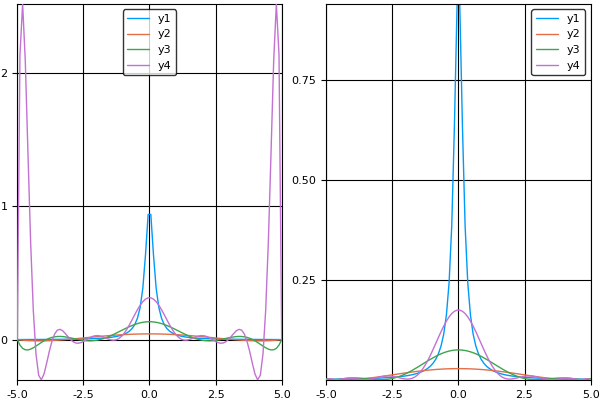

In [102]:
plot(plot1,plot2)


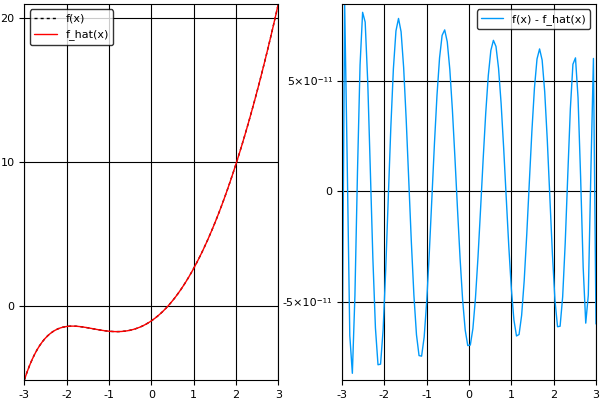

In [128]:
f(x) = x + 2*x^2 -exp(-x)
        eps = 1e-9 # degree of approx
        #define Chebychev nodes on [-1,1]
        nodes = gausschebyshev(n)[1]
        # map nodes onto [-3,3]
        x_nodes = map((x) -> 3*x, nodes)
        #true y values
        y = map(f, x_nodes)
        # basis matrix
        V = ChebyBasis(n,n,nodes)
        # solve to find c
        c = V \ y
        #predict values
        cheby_y, true_y = predict(100,n,c,-3.0,3.0,f)
        #test max deviation < 1e-9
        @test maxabs(true_y - cheby_y) < eps
        #plots
        plot1 = plot(x_new, [true_y, cheby_y], 
                    label = ["f(x)" "f_hat(x)"], linestyle = [:dot :solid], linecolor = ["black" "red"])
        plot2 = plot(x_new, true_y - cheby_y, label = "f(x) - f_hat(x)", yformatter = :scientific)
        plot(plot1,plot2)

In [112]:
[cheby_y1 cheby_y]

100×2 Array{Float64,2}:
 -5.08554  -5.08554
 -4.56371  -4.56371
 -4.09664  -4.09664
 -3.68026  -3.68026
 -3.31071  -3.31071
 -2.98439  -2.98439
 -2.69788  -2.69788
 -2.44797  -2.44797
 -2.23166  -2.23166
 -2.0461   -2.0461 
 -1.88862  -1.88862
 -1.7567   -1.7567 
 -1.64798  -1.64798
  ⋮                
 13.1253   13.1253 
 13.7646   13.7646 
 14.4182   14.4182 
 15.0863   15.0863 
 15.7687   15.7687 
 16.4656   16.4656 
 17.1769   17.1769 
 17.9026   17.9026 
 18.6428   18.6428 
 19.3974   19.3974 
 20.1666   20.1666 
 20.9502   20.9502 

### 4.b. Spline Interpolation: where to place knots?  `q4b()`

* Produce a plot with 2 panels. Panel 1 (*Runge's function*) shows $f(x),x\in[-5,5]$, panel 2 (*Error in Runge's function*) shows deviations of your approximation to it (see below).
* Use 2 versions of a cubic spline to approximate the function:
    * version 1: use 13 equally spaced knots when you set up the `BSpline` object. Remember, that this is
    ```julia
    using ApproXD
    b = BSpline(nknots,deg,lb,ub)  # knot vector is chosen for you
    ```
    * version 2: use 13 knots that are concentrated towards 0.
    ```julia
    using ApproXD
    b = BSpline(my_knots,deg)   # you choose my_knots
    ```
* To estimate your approximating coefficients, evaluate the basis and $f$ at `nevals=5*13=65` equidistant points.
* So, panel 2 of your plot should show 2 lines (`f - approx1` and `f - approx2`), as well as the placement of your concentrated knots.


In [139]:
using ApproXD
b = BSpline(13, 3, -5.0, 5.0)

BSpline object with
degree: 3
number of knots: 13
[lower,upper]: [-5.0,5.0]
knot vector: [-5.0,-5.0,-5.0,-5.0,-4.16667,-3.33333,-2.5,-1.66667,-0.833333,0.0,0.833333,1.66667,2.5,3.33333,4.16667,5.0,5.0,5.0,5.0]


In [121]:
B = full(getBasis(collect(linspace(-5.0,5.0,65)),b));


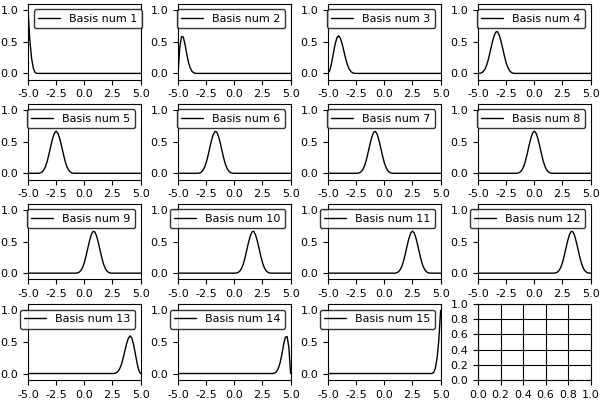

In [123]:
plot(linspace(-5.0,5.0,65),B,layout=(4,4),grid=false,
    ylim=(-0.1,1.1),label=transpose(["Basis num $i" for i in 1:15]),linewidth=1,linecolor=:black)

In [147]:
b["knot vector"]

LoadError: MethodError: no method matching getindex(::ApproXD.BSpline, ::String)


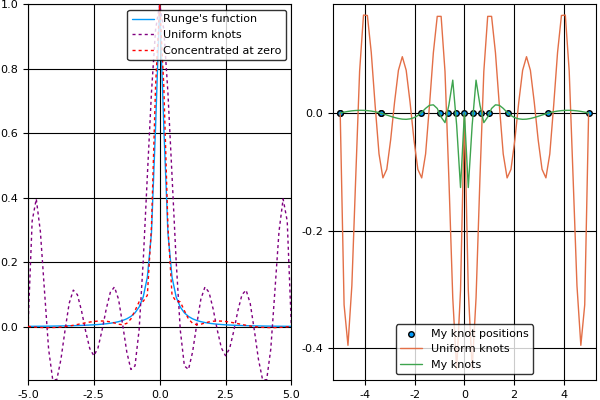

In [242]:
using ApproXD
b = BSpline(13, 3, -5.0, 5.0)
Basis = full(getBasis(collect(linspace(-5,5,15)),b))
y = r.(linspace(-5,5,15))
c = Basis \ y
x_new = linspace(-5,5,65)
true_y = r.(x_new)
Basis1 = full(getBasis(collect(x_new),b))
Bs_y1 = Basis1*c

knots = vcat( collect(linspace(-5,-1.75,3)), collect(linspace(-1,1,7)), collect(linspace(1.75,5,3)) )
b2 = BSpline(knots, 3)
Basis2 = full(getBasis(knots,b2))
y = r.(knots)
c2 = Basis2 \ y
Basis3 = full(getBasis(collect(x_new),b2))
Bs_y2 = Basis3*c2
plot1 = plot(x_new, [true_y, Bs_y1, Bs_y2], 
    linecolor = [:auto "purple" "red"], line = [:solid :dot :dot], 
    labels = ["Runge's function" "Uniform knots" "Concentrated at zero"])
plot2 = scatter(knots, zeros(15), labels = "My knot positions")
plot2 = plot!(x_new, [true_y - Bs_y1, true_y-Bs_y2], labels = ["Uniform knots" "My knots"])
plot(plot1, plot2)

In [232]:
knots

13-element Array{Float64,1}:
 -5.0 
 -3.75
 -2.5 
 -1.25
 -1.0 
 -0.5 
  0.0 
  0.5 
  1.0 
  1.25
  2.5 
  3.75
  5.0 

## 5. Splines and Kinks

Interpolate the function $f(x) = |x|^{0.5},x\in[-1,1]$ with a cubic spline, with 13 knots, and 65 evaluation points to estimate it's coefficients. 

Produce a plot with 3 panels:

1. Plot the true function. It has a kink at 0.
1. plot two spline approximations. 
    1. a spline with a uniform knot vector.
    1. a spline with a knot vector that has a knot multiplicity at the kink $x=0$. How many knots do you have to set equal to zero to produce a kink? note that the total number of (interior) knots should not change (i.e. 13).
1. In panel three plot the errors of both approximations.

In [130]:
points

Dict{Int64,LinSpace{Float64}} with 1 entry:
  1 => linspace(-3.0,3.0,15)


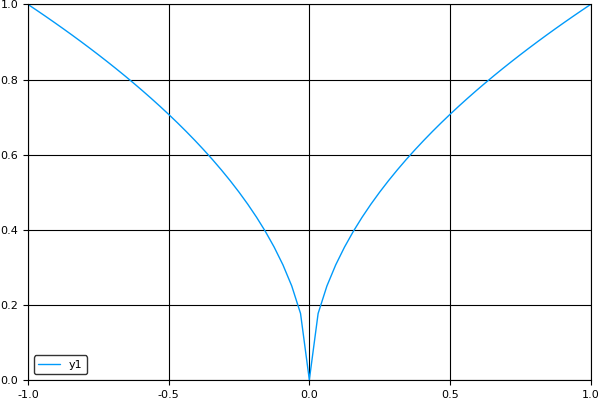

In [9]:
t(x) = sqrt(abs(x))
true_x = linspace(-1,1,65)
true_y = map(t,true_x)
plot0 = plot(true_x,true_y)


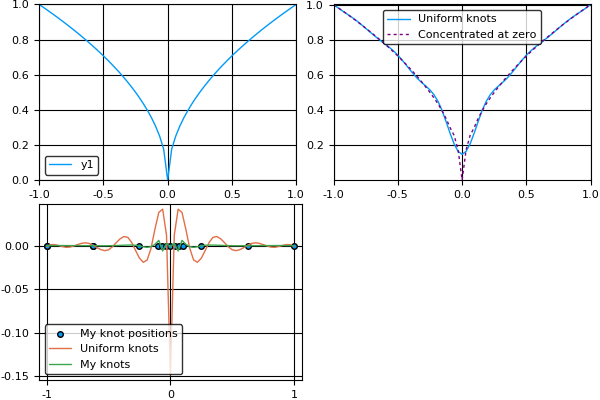

In [13]:
using ApproXD
b = BSpline(13, 3, -1.0, 1.0)
Basis = full(getBasis(collect(linspace(-1,1,65)),b))
y = t.(linspace(-1,1,65))
c = Basis \ y
x_new = linspace(-1,1,65)
true_y = t.(x_new)
Basis1 = full(getBasis(collect(x_new),b))
Bs_y1 = Basis1*c

#knots = vcat( collect(linspace(-1,0,7)), 0, collect(linspace(0,1,7)) )
knots = vcat( collect(linspace(-1,-.25,3)), collect(linspace(-.1,.1,7)), collect(linspace(.25,1,3)) )
b2 = BSpline(collect(knots), 3)
Basis2 = full(getBasis(collect(x_new),b2))
y = t.(x_new)
c2 = Basis2 \ y
Basis3 = full(getBasis(collect(x_new),b2))
Bs_y2 = Basis3*c2
plot1 = plot(x_new, [Bs_y1, Bs_y2], 
    linecolor = [:auto "purple" "red"], line = [:solid :dot :dot], 
    labels = ["Uniform knots" "Concentrated at zero"])
plot2 = scatter(knots, zeros(15), labels = "My knot positions")
plot2 = plot!(x_new, [true_y - Bs_y1, true_y-Bs_y2], labels = ["Uniform knots" "My knots"])
plot(plot0, plot1, plot2)

In [1]:
x_new

LoadError: UndefVarError: x_new not defined

running all questions of HW-funcapprox:



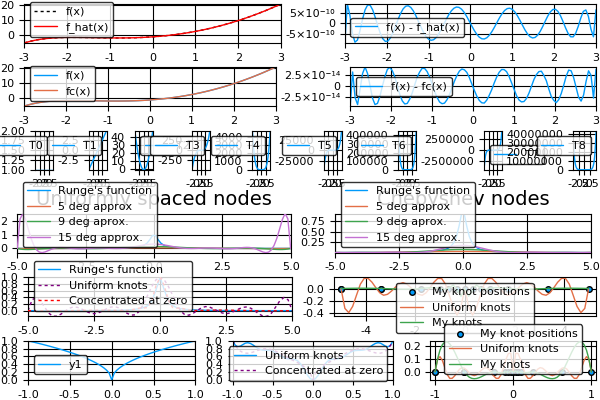

In [335]:
include("src/funcapp.jl")
funcapp.runall()